## Introduction
### Motivation

Heart disease is a leading cause of death globally, emphasizing the importance of effective prediction and prevention strategies. Early identification of individuals at risk can significantly improve health outcomes and reduce mortality. Machine learning, specifically Decision Tree Classifiers<sup>6</sup>, offers a robust tool for identifying critical risk factors for heart disease, aiding in both prevention and early diagnosis.

### Targeted Problem

**Research Question**: This project aims to identify the most significant risk factors for heart disease using a Decision Tree Classifier. The objective is to determine which features, such as BMI or lifestyle habits, have the greatest impact on the likelihood of developing heart disease. The results will inform targeted prevention strategies and support early diagnosis.

By comparing the performance of Decision Tree models across two platforms, Python and R, the project also examines how different implementations affect the identification of critical risk factors. This exploration seeks to understand model behavior on imbalanced health data and to identify the key features influencing heart disease for better healthcare outcomes.

## Solution
### Platform 1: Python

For the Python-based analysis, I utilize the scikit-learn library<sup>1</sup>, which provides a well-established and flexible toolkit for machine learning, including decision trees. The `DecisionTreeClassifier` function from scikit-learn is employed to construct the model, leveraging the entropy criterion to split the data at each node.

#### Key Functions and Code Implementation:

1. **Model Training**:
The decision tree model is built using the `DecisionTreeClassifier` function, setting `max_depth=5` to prevent overfitting, and using `criterion='entropy'` for information gain-based splitting<sup>6</sup>.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_classifier = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dt_classifier.fit(X_train, y_train)


- **Data Split**: The data is split into training and testing sets using `train_test_split()`. `test_size=0.3` allocates 30% of the data for testing and 70% for training. `random_state=42` sets a seed for random number generation, ensuring that the split is reproducible.

- **Training the Classifier**: A Decision Tree is trained with `max_depth=5` to prevent overfitting and `criterion='entropy'` to optimize splits based on information gain.

2. **Model Evaluation**:
The provided Python code calculates key performance metrics for the model based on the confusion matrix and predictions


In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = conf_matrix.ravel()
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label=1)
recall = recall_score(y_test, predictions, pos_label=1)
balanced_acc = balanced_accuracy_score(y_test, predictions)
kappa = cohen_kappa_score(y_test, predictions)
sensitivity = recall 
specificity = TN / (TN + FP)
pos_pred_val = precision  
neg_pred_val = TN / (TN + FN)
detection_rate = TP / len(y_test)
detection_prevalence = (TP + FP) / len(y_test)

- **Accuracy**<sup>3</sup>: Measures the proportion of correct predictions out of all predictions made. It is calculated using the `accuracy_score` function, which compares the true labels (`y_test`) with the predicted labels (`predictions`).
- **Precision (Positive Predictive Value)** <sup>6</sup>: Determines how many of the positive predictions (class '1' or heart attack cases) were correct. The `precision_score` function is used here with `pos_label=1` to specify that we are interested in the precision for positive class predictions.
- **Recall (Sensitivity)** <sup>5</sup>: Measures the ability of the model to correctly identify all positive instances. It calculates how many actual positive cases were correctly predicted. The `recall_score` function with `pos_label=1` focuses on the recall for positive cases.
- **Balanced Accuracy**<sup>3</sup>: Accounts for imbalanced classes by averaging sensitivity and specificity.
- **Kappa**<sup>4</sup>: Measures the agreement between predictions and actual outcomes, adjusted for chance.
- **Specificity**<sup>5</sup>: Indicates the model's ability to correctly identify negatives.
- **Negative Predictive Value**<sup>6</sup>: Evaluates the correctness of negative predictions.
- **Detection Rate and Detection Prevalence**<sup>6</sup>: Show the frequency of positive predictions and the proportion of detected positive cases.


3. **Model Visualization**:
The decision tree is visualized using `plot_tree` from the matplotlib library, allowing for an in-depth exploration of how the model made its decisions based on the features. 


In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=3, criterion='entropy')  # reducing depth for clarity
dt_classifier.fit(X_train, y_train)
plt.figure(figsize=(24, 12))  # increase the size as needed
tree_plot = plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'], rounded=True, proportion=False, precision=2)
plt.show()


This code trains a Decision Tree classifier using entropy to determine the best data splits, with the tree depth limited to 3 to enhance visual clarity. By reducing the depth, the tree structure is simplified, making it easier to interpret how features influence the target variable.

In [ ]:
# Extract feature importances
feature_importances = pd.DataFrame(dt_classifier.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
# Extract the top 10 features and their importances
top_features = feature_importances.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features['importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

This code extracts the feature importances from a trained Decision Tree classifier and visualizes the top 10 most significant features in a bar plot. It helps identify the risk factors that contribute most to the prediction of the target variable, allowing for better understanding of the model's decision-making process.

### Platform 2: R

For the R-based analysis, I utilize the `rpart` library<sup>2</sup>, which is the standard for implementing decision trees in R. While the `rpart` function defaults to Gini impurity as its splitting criterion, the model's parameters are adjusted to align closely with the Python implementation by controlling the tree's depth and complexity.

#### Key Functions and Code Implementation:

1. **Model Training**:
The decision tree is constructed using the `rpart` function, with `maxdepth=5` and `cp=0.001` to regulate the tree’s depth and complexity. This setting ensures that the model does not overfit the training data while remaining interpretable<sup>6</sup>.


In [ ]:
```{r}
set.seed(42)
trainingIndex <- createDataPartition(data$HadHeartAttack, p = 0.7, list = FALSE)
train <- data[trainingIndex, ]
test <- data[-trainingIndex, ]
dt_model <- rpart(HadHeartAttack ~ .,data = train,  method = "class", control = rpart.control(maxdepth = 5, cp = 0.001, minsplit = 20))
```

- **Splitting the Dataset**: 
  The dataset is split into training (70%) and testing (30%) sets using `createDataPartition()` from the `caret` package. 
  - `p = 0.7` ensures 70% for training, while `set.seed(42)` ensures reproducibility. 
  - The training set (`train`) is created with indices from `trainingIndex`, and the remaining data forms the testing set (`test`).

- **Training the Decision Tree Classifier**: 
  A Decision Tree is trained using the `rpart` function. 
  - `maxdepth=5` controls the tree's depth to avoid overfitting. 
  - `cp=0.001` prunes the tree to prevent unnecessary splits, and `minsplit=20` ensures splits occur only when there are sufficient data points.

2. **Model Visualization**:
I use `rpart.plot` to visualize the decision tree and use `ggplot2` to give a visual representation of the top 10 most important factors, making it easy to interpret the splits and the importance of features.


In [ ]:
```{r}
rpart.plot(dt_model, main = "Decision Tree for Heart Disease Risk Factors", extra = 106)
```

The `rpart.plot` function is used to visualize the decision tree model (`dt_model`), with the title "Decision Tree for Heart Disease Risk Factors." The `extra = 106` argument adds additional details to the plot, displaying both the predicted class and the probability of each class at the terminal nodes. This enhances the interpretability of the model by showing how each split contributes to the final predictions.







In [ ]:
```{r}
importance <- as.data.frame(dt_model$variable.importance)
importance$Variable <- rownames(importance)
colnames(importance) <- c("Importance", "Variable")
importance <- importance[order(-importance$Importance), ]
top_10_importance <- importance[1:10, ]
ggplot(top_10_importance, aes(x = reorder(Variable, Importance), y = Importance)) + geom_bar(stat = "identity", fill = "steelblue") + coord_flip() + theme_minimal() + labs(title = "Top 10 Significant Risk Factors", x = "Risk Factors", y = "Importance")
```

The `dt_model$variable.importance` extracts the importance scores from the decision tree model. We convert it into a data frame and sort it to get the top 10 most important factors. `ggplot2` is used to create a horizontal bar chart showing the top 10 most important risk factors based on their importance values.

3. **Model Evaluation**:
I use the `caret` package to create a confusion matrix, ensuring accurate performance reporting for the model.


In [ ]:
```{r}
predictions <- predict(dt_model, newdata = test, type = "class")
predictions <- as.factor(predictions)
test$HadHeartAttack <- as.factor(test$HadHeartAttack)
levels(predictions) <- levels(test$HadHeartAttack)
confusionMatrix(predictions, test$HadHeartAttack)
```

The predict() function generates class label predictions for the test set using the trained decision tree model (dt_model). Both the predicted values (predictions) and actual values (test$HadHeartAttack) are converted to factors to ensure consistent format. Levels of the predictions are matched with the actual target variable to maintain consistency. Model performance is evaluated using the confusionMatrix() function from the caret package, providing key metrics like accuracy, sensitivity, and specificity to assess how well the model performs on the test data.

## Key results and metrics

### Performance of the Decision Tree model

The following are the performance results of the Decision Tree models implemented in both Python and R, evaluated using a range of key metrics. 


| **Metric**                  | **Python**              | **R**                     |
|-----------------------------|-------------------------|---------------------------|
| **Confusion Matrix**<sup>6</sup>   | `[[125058, 1014], [6101, 1355]]` | `[[125170, 6134], [966, 1257]]` |
| **Accuracy**<sup>3</sup>                 | 0.9467                  | 0.9468                    |
| **Balanced Accuracy**<sup>3</sup>        | 0.5868                  | 0.5812                    |
| **Kappa**<sup>4</sup>                    | 0.2558                  | 0.2421                    |
| **Sensitivity (Recall)** <sup>5</sup>     | 0.1817                  | 0.9923                    |
| **Specificity**<sup>5</sup>              | 0.9920                  | 0.1701                    |
| **Positive Predictive Value**<sup>6</sup>| 0.5720                  | 0.9533                    |
| **Negative Predictive Value**<sup>6</sup>| 0.9535                  | 0.5655                    |
| **Detection Rate**<sup>6</sup>           | 0.0101                  | 0.9374                    |
| **Detection Prevalence** <sup>6</sup>    | 0.0177                  | 0.9834                    |

### Key Insights and Conclusion:

The comparison between the Decision Tree models in Python and R highlights differences in sensitivity and specificity. Python predicts fewer false positives but misses more true positives, prioritizing specificity, while R captures more true positives at the cost of higher false positives, favoring sensitivity<sup>5</sup>. Both models show similar overall accuracy, but this can be misleading in imbalanced datasets. Balanced accuracy and Kappa scores, around 0.25, reveal both models struggle with minority class predictions. The R model excels in Positive Predictive Value (PPV), while Python performs better in Negative Predictive Value (NPV), correctly identifying more negative cases.

Sensitivity and specificity underscore the difference between the models. The R model has extremely high sensitivity, identifying almost all true positive cases but at the cost of more false positives. On the other hand, Python’s model excels in specificity, correctly identifying negative cases while missing many true positives. This trade-off depends on the specific problem at hand, with R being preferable for catching positive cases and Python for minimizing false positives.

Ultimately, the choice between these models depends on the research focus. If the goal is to comprehensively identify risk factors that could be critical to diagnosis, the R model’s sensitivity is preferable. However, if minimizing unnecessary alerts is important, the Python model’s specificity would better suit the task.



## Decision Tree visualization

### Python Decision Tree


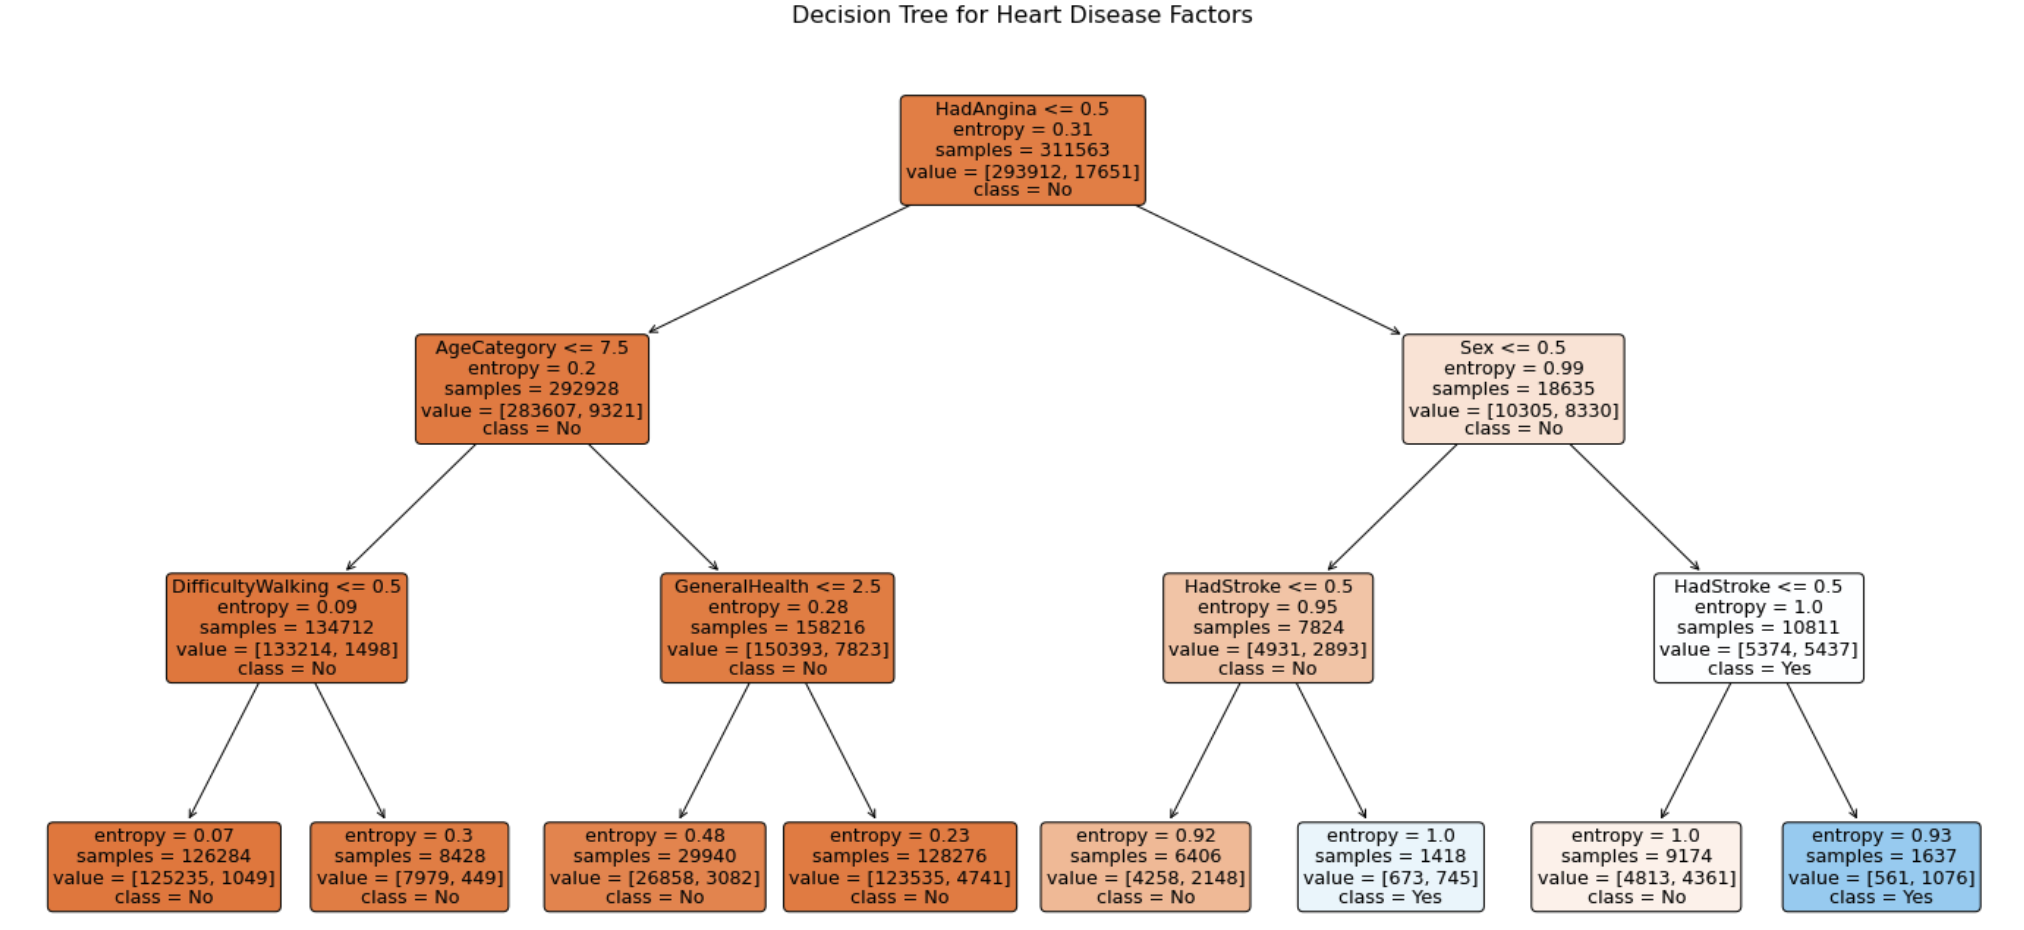

In [11]:
display(HTML(python_dc))

The Decision Tree, built with a maximum depth of 5 and entropy as the splitting criterion, first splits on **HadAngina**, followed by **AgeCategory**, **Sex**, **GeneralHealth**, and **HadStroke**.
- **Node Information**:
  - **Condition**: Splits based on the threshold (e.g., HadAngina ≤ 0.5).
  - **Splitting Criterion**: Entropy measures the impurity at the node.
  - **Sample Size**: The number of samples at each node.
  - **Predicted Class**: The class with the majority of samples.
    
The model predominantly predicts class 0 (no heart attack), highlighting its bias due to dataset imbalance and the potential need for data balancing or sensitivity adjustments.

### R Decision Tree


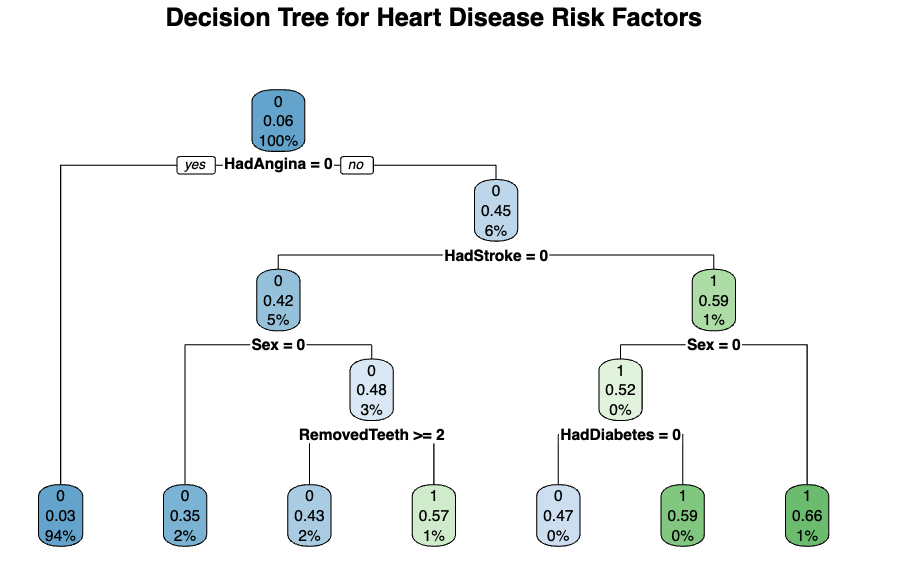

In [13]:
display(HTML(r_dc))

The Decision Tree in R was built with a maximum depth of 5, using the Gini index as the splitting criterion and pruned with a complexity parameter (`cp = 0.001`). The root node splits on **HadAngina**, followed by **HadStroke**, **Sex**, **RemovedTeeth**, and **HadDiabetes**.

- **Node Information**:
  - **Predicted Class**: The majority class at each node (e.g., class 0 for no heart attack).
  - **Impurity**: Gini impurity value, where lower values indicate higher node purity.
  - **Percentage of Data**: Proportion of samples at each node that belong to the predicted class.
  - **Condition**: The rule defining the node split (e.g., HadAngina = 0).

The model predominantly predicts class 0 (no heart attack), but shows more splits due to pruning, reducing overfitting and simplifying the tree.



### Key Insights and Conclusion:

In both Python and R models, HadAngina consistently emerges as the most important factor in predicting heart disease risk. Other significant features include HadStroke and Sex. The Python model highlights AgeCategory and GeneralHealth as additional important features, while the R model emphasizes RemovedTeeth and HadDiabetes.

Both models show a bias toward class 0 (no heart disease), likely due to the dataset imbalance. However, Python’s tree, with higher specificity, predicts fewer false positives, while R’s higher sensitivity captures more true positives at the cost of more false positives.

The analysis successfully identified HadAngina, HadStroke, and Sex as the most significant risk factors for heart disease using Decision Tree classifiers in both Python and R. HadAngina emerged as the strongest predictor across both platforms. Python's model, with a deeper and more complex tree, highlighted additional features like AgeCategory and GeneralHealth, while R’s pruned tree emphasized RemovedTeeth and HadDiabetes. Both models confirm that these factors play a crucial role in heart disease risk, though the choice between models depends on whether higher sensitivity (R) or specificity (Python) is more desirable for the given application.

## Top 10 Factors


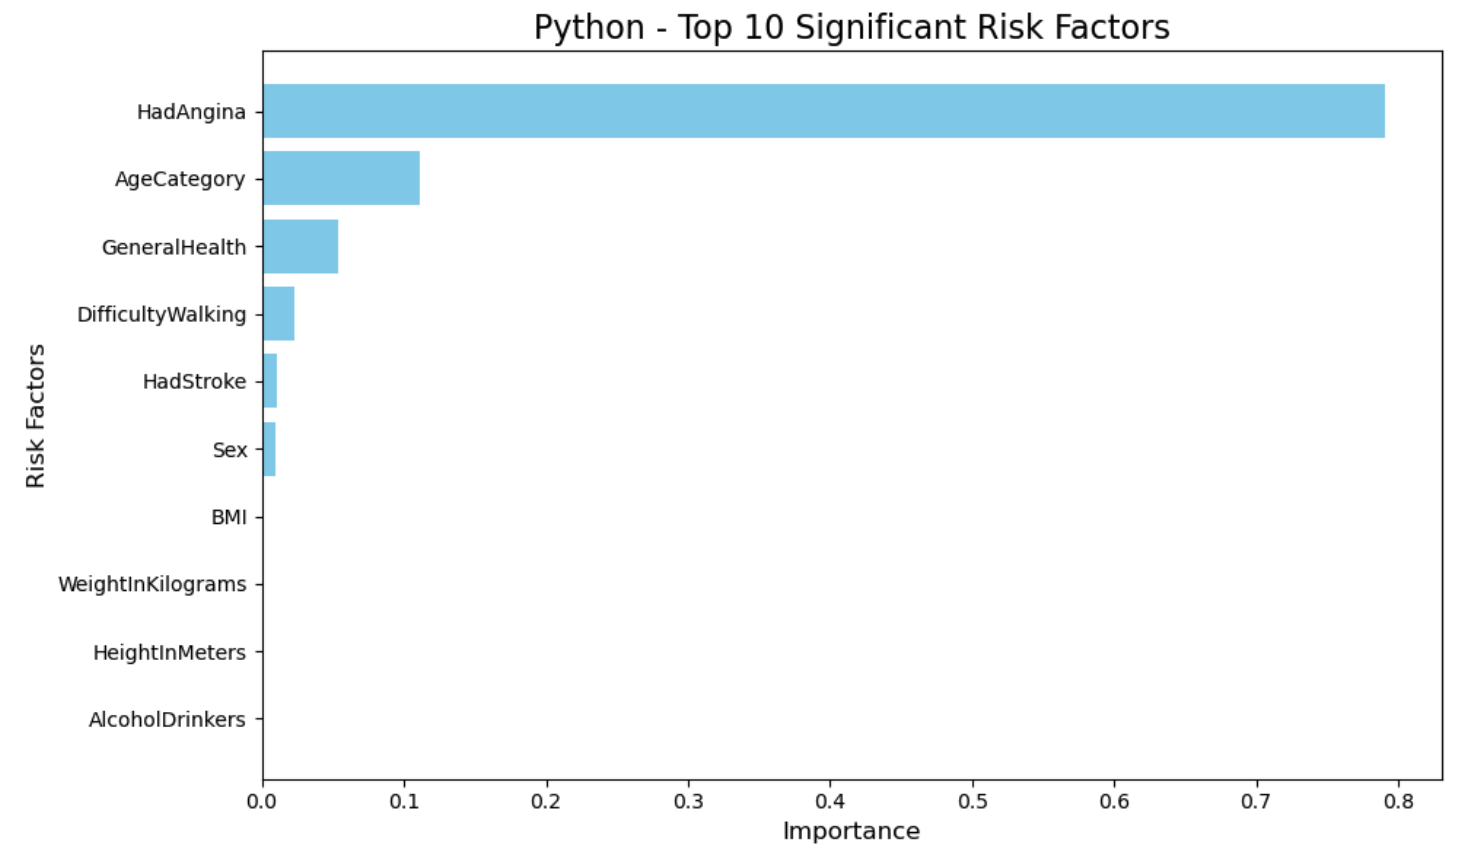

In [71]:
display(HTML(python_top))


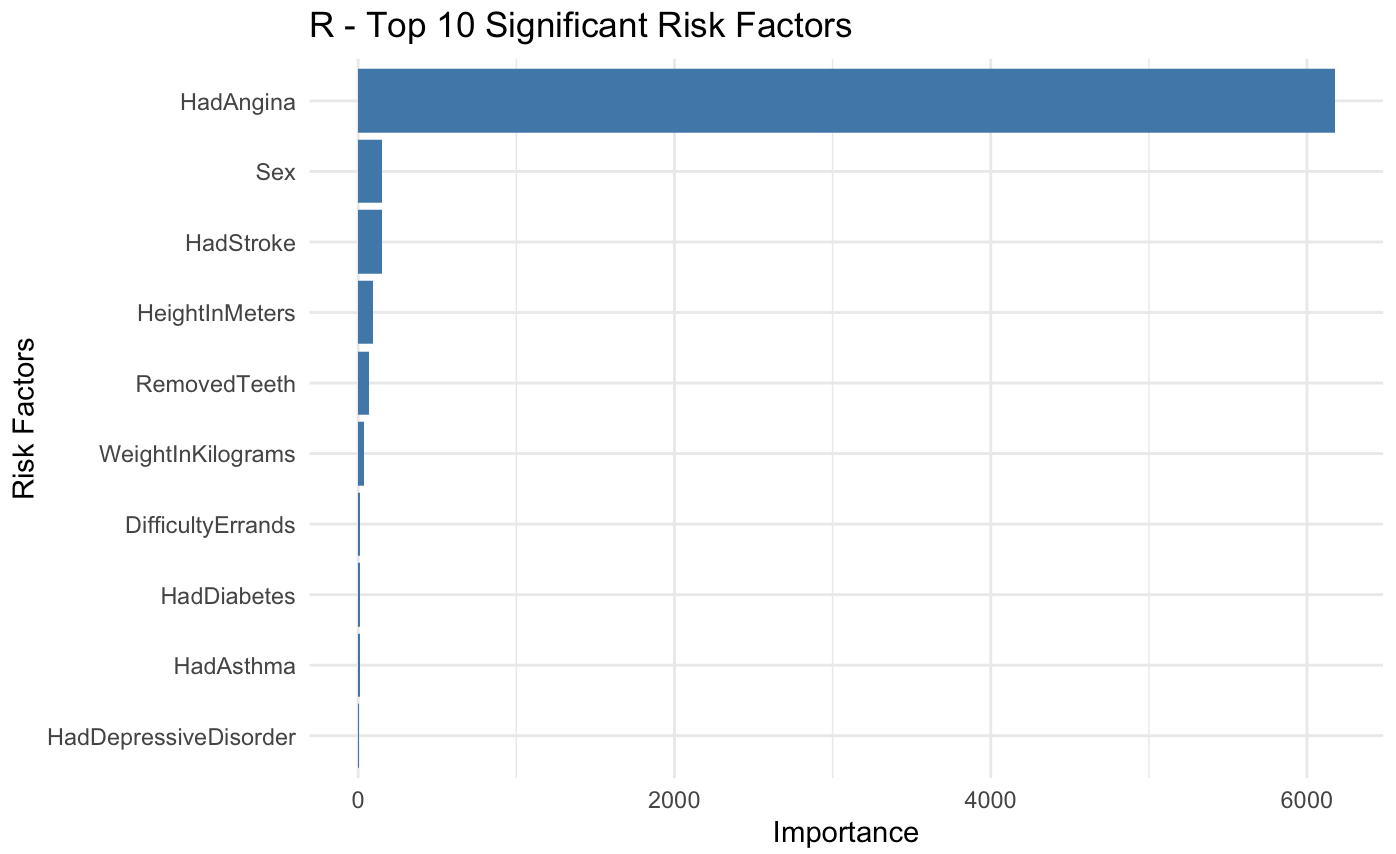

In [73]:
display(HTML(r_top))

Both figures highlight the top 10 significant factors influencing heart disease risk based on Decision Tree models. Despite using the same dataset, the emphasis on features varies between platforms.

- Python prioritizes `HadAngina` as the dominant factor, with `AgeCategory`, `GeneralHealth`, and `DifficultyWalking` playing smaller but notable roles. Factors like `HadStroke` and `Sex` contribute minimally.

- R also identifies `HadAngina` as the key predictor, but `Sex`, `HadStroke`, `RemovedTeeth`,and `HeightInMeters` are more emphasized compared to Python, pushing factors like RemovedTeeth and WeightInKilograms lower in importance.

In conclusion, while both models agree on HadAngina as the primary factor, platform-specific differences influence the ranking of other risk factors.

## Summary

This project aimed to identify significant risk factors for heart disease using a Decision Tree Classifier across Python and R. The primary objective was to determine which features—such as **HadAngina**, **AgeCategory**, and **GeneralHealth**—had the most influence on heart disease risk.

### What Worked:
Both models consistently highlighted **HadAngina** as the most critical risk factor, aligning with medical research linking angina to heart disease<sup>7</sup>. The models also delivered high overall accuracy (around 94.6%), demonstrating their effectiveness in predicting heart disease in most cases. Visualization of top factors provided clear insights into feature importance, aiding interpretation of the results.

### What Didn’t Work:
A significant discrepancy was observed between the models' Sensitivity and Specificity. The Python model prioritized specificity, identifying true negatives effectively but missing true positives, while the R model focused on sensitivity, capturing more true positives but producing more false positives. This imbalance made interpretation difficult and highlighted platform biases in error types. Additionally, both models exhibited a bias toward predicting "no heart disease" due to the imbalanced dataset, negatively impacting metrics like Balanced Accuracy and Kappa.

### Surprising Findings:
A notable surprise was the significant difference in sensitivity and specificity between the platforms despite similar settings. Python excelled at reducing false positives but missed true cases, while R captured more positives at the cost of increased false positives. The variation in the importance of secondary factors, such as **Sex** and **GeneralHealth**, between the two models was also unexpected.

In conclusion, the project successfully identified key heart disease risk factors, but further refinement is needed to balance sensitivity and specificity across platforms.


## References

1. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research, 12*, 2825-2830.  
2. Therneau, T., Atkinson, B., & Ripley, B. (2019). *rpart: Recursive partitioning and regression trees* [R package version 4.1-15]. https://CRAN.R-project.org/package=rpart  
3. Brodersen, K. H., Ong, C. S., Stephan, K. E., & Buhmann, J. M. (2010). The balanced accuracy and its posterior distribution. In *2010 20th International Conference on Pattern Recognition* (pp. 3121-3124). IEEE. https://doi.org/10.1109/ICPR.2010.764  
4. Cohen, J. (1960). A coefficient of agreement for nominal scales. *Educational and Psychological Measurement, 20*(1), 37-46. https://doi.org/10.1177/001316446002000104  
5. Powers, D. M. W. (2011). Evaluation: From precision, recall, and F-measure to ROC, informedness, markedness, and correlation. *Journal of Machine Learning Technologies, 2*(1), 37-63. https://doi.org/10.48550/arXiv.2010.16061  
6. Altman, D. G., & Bland, J. M. (1994). Statistics notes: Diagnostic tests 2: Predictive values. *BMJ, 309*(6947), 102. https://doi.org/10.1136/bmj.309.6947.102  
7. Kannel, W. B., & Sorlie, P. (1979). Some health benefits of physical activity: The Framingham Study. *Archives of Internal Medicine, 139*(8), 857-861. https://doi.org/10.1001/archinte.139.8.857  





# Appendix

## Platform 1: Python

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import base64
from IPython.display import HTML

In [9]:

origin_data = pd.read_csv('heart_2022_with_nans.csv')
data = origin_data
data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


## Number of data samples and types of attributes

In [11]:
print("Number of samples:", data.shape[0])
print("Number of attributes:", data.shape[1])

Number of samples: 445132
Number of attributes: 40


## Feature Description

| **Feature**                    | **Description**                                                                         |
|--------------------------------|-----------------------------------------------------------------------------------------|
| **State**                      | U.S. states where the data was collected.                                               |
| **Sex**                        | Gender of the respondent (Male/Female).                                                 |
| **GeneralHealth**              | Self-reported overall health status of the respondent.                                  |
| **PhysicalHealthDays**         | Number of days the respondent engaged in physical activities in the past 30 days.       |
| **MentalHealthDays**           | Number of days the respondent received psychological health treatment in the past 30 days. |
| **LastCheckupTime**            | Time since the respondent's last medical check-up.                                      |
| **PhysicalActivities**         | Frequency of physical exercise by the respondent.                                       |
| **SleepHours**                 | Average hours of sleep per night reported by the respondent.                            |
| **RemovedTeeth**               | Indicates whether the respondent has had teeth removed due to decay or disease.         |
| **HadHeartAttack**             | Indicates whether the respondent has ever had a heart attack (Yes/No).                  |
| **HadAngina**                  | Indicates whether the respondent has experienced chest pain or angina.                  |
| **HadStroke**                  | Indicates whether the respondent has ever had a stroke (Yes/No).                        |
| **HadAsthma**                  | Indicates whether the respondent has ever been diagnosed with asthma.                   |
| **HadSkinCancer**              | Indicates whether the respondent has ever been diagnosed with skin cancer.              |
| **HadCOPD**                    | Indicates whether the respondent has ever been diagnosed with chronic obstructive pulmonary disease (COPD). |
| **HadDepressiveDisorder**      | Indicates whether the respondent has ever been diagnosed with depression.               |
| **HadKidneyDisease**           | Indicates whether the respondent has ever been diagnosed with kidney disease.           |
| **HadArthritis**               | Indicates whether the respondent has ever been diagnosed with arthritis.                |
| **HadDiabetes**                | Indicates whether the respondent has ever been diagnosed with diabetes.                 |
| **DeafOrHardOfHearing**        | Indicates whether the respondent is deaf or hard of hearing.                            |
| **BlindOrVisionDifficulty**    | Indicates whether the respondent has difficulty seeing or is blind.                     |
| **DifficultyConcentrating**    | Indicates whether the respondent has difficulty concentrating.                          |
| **DifficultyWalking**          | Indicates whether the respondent has difficulty walking.                                |
| **DifficultyDressingBathing**  | Indicates whether the respondent has difficulty dressing or bathing.                    |
| **DifficultyErrands**          | Indicates whether the respondent has difficulty running errands independently.          |
| **SmokerStatus**               | Smoking status of the respondent (Current smoker/Former smoker/Never smoked).           |
| **ECigaretteUsage**            | Indicates whether the respondent uses e-cigarettes.                                     |
| **ChestScan**                  | Indicates whether the respondent has had a chest scan or imaging test.                  |
| **RaceEthnicityCategory**      | Racial or ethnic background of the respondent (e.g., Black, White, Asian, Hispanic).    |
| **AgeCategory**                | Age group of the respondent (e.g., 18-24, 25-34, 35-44, etc.).                          |
| **HeightInMeters**             | Height of the respondent in meters.                                                     |
| **WeightInKilograms**          | Weight of the respondent in kilograms.                                                  |
| **BMI**                        | Body Mass Index, calculated as weight in kilograms divided by height in meters squared. |
| **AlcoholDrinkers**            | Indicates whether the respondent consumes alcohol.                                      |
| **HIVTesting**                 | Indicates whether the respondent has been tested for HIV.                               |
| **FluVaxLast12**               | Indicates whether the respondent received a flu vaccine in the last 12 months.          |
| **PneumoVaxEver**              | Indicates whether the respondent has ever received a pneumococcal vaccine.              |
| **TetanusLast10Tdap**          | Indicates whether the respondent has received a tetanus vaccine in the last 10 years.   |
| **HighRiskLastYear**           | Indicates whether the respondent was at high risk for health issues in the last year.   |
| **CovidPos**                   | Indicates whether the respondent has tested positive for COVID-19.                      |


# Data Pre-processing


## Check for missing data

In [17]:
origin_data = pd.read_csv('heart_2022_with_nans.csv')
data = origin_data

missing_data_count = data.isnull().sum()
missing_data_percentage = (missing_data_count / len(data)) * 100
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_data_count,
    'Percentage': missing_data_percentage
})
missing_data_summary

,Missing Values,Percentage
State,0,0.000000
Sex,0,0.000000
GeneralHealth,1198,0.269134
PhysicalHealthDays,10927,2.454777
MentalHealthDays,9067,2.036924
LastCheckupTime,8308,1.866413
PhysicalActivities,1093,0.245545
SleepHours,5453,1.225030
RemovedTeeth,11360,2.552052
HadHeartAttack,3065,0.688560


## Handle Missing Value

1. Mode Imputation
- Missing data from the following list of attributes will be addressed using mode imputation, where the most frequent value is used to fill in the gaps. This method is particularly effective as the missing proportions are minimal, which allows the original distribution and consistency of the data to be maintained.
    - **GeneralHealth** (0.27%)
    - **LastCheckupTime** (1.87%)
    - **PhysicalActivities** (0.25%)
    - **RemovedTeeth** (2.55%)
    - **HadHeartAttack** (0.69%)
    - **HadAngina** (0.99%)
    - **HadStroke** (0.35%)
    - **HadAsthma** (0.40%)
    - **HadSkinCancer** (0.71%)
    - **HadCOPD** (0.50%)
    - **HadDepressiveDisorder** (0.63%)
    - **HadKidneyDisease** (0.43%)
    - **HadArthritis** (0.59%)
    - **HadDiabetes** (0.24%)
    - **AgeCategory** (2.04%)
2. Median Imputation
- Missing data from the following features will be replaced with the median value. This method effective for handling levels of missing data in the numerical features, as it preserves the central tendency and is robust to outliers:
    - **PhysicalHealthDays** (2.45%)
    - **MentalHealthDays** (2.04%)
    - **SleepHours** (1.23%)
3. Separate Category for Missing Values
- For categorical attributes where missingness may carry significant information, their missing values will be treated as a separate category. This helps to preserve the missingness information and maintains the potential influence of missing values.
    - **RaceEthnicityCategory** (3.16%)
    - **DeafOrHardOfHearing** (4.61%)
    - **BlindOrVisionDifficulty** (4.81%)
    - **DifficultyConcentrating** (5.41%)
    - **SmokerStatus** (7.94%)
    - **ECigaretteUsage** (7.98%)
    - **AlcoholDrinkers** (10.43%)
    - **HighRiskLastYear** (11.34%)
    - **CovidPos** (11.38%)
4. Imputation Using Other Attributes
- **Categorical Imputation:**
    - Values from other attributes could be used to replace missing data if correlation between two attributes exists. This dataset is considerably large, so even weak correlations can bring statistical significance.
    - **Criteria:** Correlation over 0.35, if multiple correlations exists, the strongest one is priorised.
    
    **Relevant Correlations:**
    
    - `HadAngina_encoded` and `HadHeartAttack_encoded`: Correlation = 0.428
    - `DifficultyDressingBathing_encoded` and `DifficultyWalking_encoded`: Correlation = 0.392
    - `DifficultyErrands_encoded` and `DifficultyWalking_encoded`: Correlation = 0.392
    - `DifficultyErrands_encoded` and `DifficultyDressingBathing_encoded`: Correlation = 0.421
    - `PneumoVaxEver_encoded` and `FluVaxLast12_encoded`: Correlation = 0.371
- **Numerical Imputation**
    - **Calculate BMI using Weight and Height:**
        - Formula: `BMI = WeightInKilograms / (HeightInMeters ** 2)`
        - If `BMI` is missing but `WeightInKilograms` and `HeightInMeters` are available, compute `BMI` using the formula.
    - **Calculate Weight using BMI and Height:**
        - Formula: `WeightInKilograms = BMI * (HeightInMeters ** 2)`
        - If `WeightInKilograms` is missing but `BMI` and `HeightInMeters` are available, compute `WeightInKilograms` using the formula.
    - **Calculate Height using BMI and Weight:**
        - Formula: `HeightInMeters = sqrt(WeightInKilograms / BMI)`
        - If `HeightInMeters` is missing but `BMI` and `WeightInKilograms` are available, compute `HeightInMeters` using the formula.
    - If above methods are not possible due to multiple missing values, values will be replaced using the mean or median of correlated attributes if the correlation between attributes is significant.
    - **Criteria:** Correlation over 0.35
    
    **Relevant Correlations:**
    
    - `WeightInKilograms` and `HeightInMeters`: Correlation = 0.47
    - `BMI` and `WeightInKilograms`: Correlation = 0.85
5. Dropped Attributes
- The following attributes will be dropped due to their significant missing percentage and no suitable imputation methods.
    - **ChestScan** (12.56%)
    - **HIVTesting** (14.83%)
    - **TetanusLast10Tdap** (18.51%)
    - **PneumoVaxEver** (17.28%)   - **TetanusLast10Tdap** (18.51%)
    - **PneumoVaxEver** (17.28%)   - **TetanusLast10Tdap** (18.51%)
    - **PneumoVaxEver** (17.28%)

In [19]:
import numpy as np
from tqdm import tqdm 

# 1. Mode Imputation
mode_impute_cols = [
    'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth',
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'AgeCategory'
]

for col in mode_impute_cols:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

# 2. Median Imputation
median_impute_cols = [
    'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours'
]

for col in median_impute_cols:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

# 3. Separate Category for Missing Values
separate_category_cols = [
    'RaceEthnicityCategory', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers',
    'HighRiskLastYear', 'CovidPos'
]

for col in separate_category_cols:
    data[col] = data[col].fillna('Missing')

# 4. Imputation Using Other Attributes

# Impute categorical data based on correlations, fallback to mode if correlation fails
correlation_map = {
    'HadAngina': 'HadHeartAttack',
    'DifficultyDressingBathing': 'DifficultyWalking',
    'DifficultyErrands': 'DifficultyWalking',
    'DifficultyWalking': 'DifficultyErrands',
    'DifficultyErrands': 'DifficultyDressingBathing',
    'PneumoVaxEver': 'FluVaxLast12',
    'FluVaxLast12': 'PneumoVaxEver',
}

for col_to_impute, correlated_col in correlation_map.items():
    if col_to_impute in data.columns and correlated_col in data.columns:
        # Determine the mode for fallback
        mode_value_to_impute = data[col_to_impute].mode()[0]
        
        # Impute using correlated column where available
        # Use correlated column value if it exists
        data[col_to_impute] = data.apply(
            lambda row: row[correlated_col] if pd.isna(row[col_to_impute]) and not pd.isna(row[correlated_col]) else row[col_to_impute],
            axis=1
        )
        
        # If both are missing, fallback to mode of the column to be imputed
        data[col_to_impute] = data[col_to_impute].fillna(mode_value_to_impute)

# Numerical Imputation with Chunk Processing and Progress Bar
def calculate_missing_values(df, chunk_size=100):
    # Function to impute missing values in chunks
    def impute_chunk(chunk_df):
        # Calculate BMI if missing
        if 'BMI' in chunk_df.columns:
            if chunk_df['BMI'].isna().any():
                if 'WeightInKilograms' in chunk_df.columns and 'HeightInMeters' in chunk_df.columns:
                    missing_bmi_idx = chunk_df[chunk_df['BMI'].isna()].index
                    chunk_df.loc[missing_bmi_idx, 'BMI'] = chunk_df.loc[missing_bmi_idx, 'WeightInKilograms'] / (chunk_df.loc[missing_bmi_idx, 'HeightInMeters'] ** 2)
        
        # Calculate Weight if missing
        if 'WeightInKilograms' in chunk_df.columns:
            if chunk_df['WeightInKilograms'].isna().any():
                if 'BMI' in chunk_df.columns and 'HeightInMeters' in chunk_df.columns:
                    missing_weight_idx = chunk_df[chunk_df['WeightInKilograms'].isna()].index
                    chunk_df.loc[missing_weight_idx, 'WeightInKilograms'] = chunk_df.loc[missing_weight_idx, 'BMI'] * (chunk_df.loc[missing_weight_idx, 'HeightInMeters'] ** 2)

        # Calculate Height if missing
        if 'HeightInMeters' in chunk_df.columns:
            if chunk_df['HeightInMeters'].isna().any():
                if 'BMI' in chunk_df.columns and 'WeightInKilograms' in chunk_df.columns:
                    missing_height_idx = chunk_df[chunk_df['HeightInMeters'].isna()].index
                    chunk_df.loc[missing_height_idx, 'HeightInMeters'] = np.sqrt(chunk_df.loc[missing_height_idx, 'WeightInKilograms'] / chunk_df.loc[missing_height_idx, 'BMI'])
        
        # Recalculate and impute remaining missing values
        numerical_impute_cols = ['WeightInKilograms', 'HeightInMeters', 'BMI']
        for col in numerical_impute_cols:
            if col in chunk_df.columns:
                if chunk_df[col].isna().any():
                    mean = chunk_df[col].mean()
                    chunk_df.loc[:, col] = chunk_df[col].fillna(mean)
        
        return chunk_df

    # Initialize progress bar
    num_chunks = int(np.ceil(len(df) / chunk_size))
    
    # Process data in chunks
    for start in tqdm(range(0, len(df), chunk_size), total=num_chunks, desc="Processing chunks"):
        end = min(start + chunk_size, len(df))
        chunk_df = df.iloc[start:end].copy()  # Ensure chunk is a copy
        chunk_df = impute_chunk(chunk_df)
        
        # Update the main DataFrame with the processed chunk
        df.iloc[start:end] = chunk_df
        

# Call the function to impute missing values
calculate_missing_values(data)

# 5. Dropped Attributes
dropped_attributes = [
    'ChestScan', 'HIVTesting', 'TetanusLast10Tdap', 'PneumoVaxEver'
]

data = data.drop(columns=dropped_attributes)

missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

print("Missing value handling is complete.")
missing_summary

Processing chunks:   0%|          | 0/4452 [00:00<?, ?it/s]Error processing line 3 of /Users/yunshuozhang/opt/anaconda3/lib/python3.9/site-packages/googleapis_common_protos-1.59.0-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/yunshuozhang/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Processing chunks: 100%|██████████| 4452/4452 [00:55<00:00, 80.22it/s]


Missing value handling is complete.


,Missing Values,Percentage
State,0,0.0
Sex,0,0.0
GeneralHealth,0,0.0
PhysicalHealthDays,0,0.0
MentalHealthDays,0,0.0
LastCheckupTime,0,0.0
PhysicalActivities,0,0.0
SleepHours,0,0.0
RemovedTeeth,0,0.0
HadHeartAttack,0,0.0


## Check for duplicates

Duplicates can skew statistical results, introduce bias, and lead to overfitting in machine learning models. By removing duplicates, it can improve the quality of the dataset and make sure that each observation is unique.

In [21]:
duplicates = data.duplicated().sum()
duplicates

41

In [22]:
# Drop duplicate rows
data = data.drop_duplicates()

## Checking for outliers using Z-score

The Z-score is a statistical measure that indicates how far a data point deviates from the mean of the dataset. According to the Empirical Rule (68-95-99.7 Rule), in a normal distribution, about 99.7% of the data falls within 3 standard deviations from the mean. Therefore, a data point with a Z-score greater than 3 or less than -3 is typically considered an outlier because it lies outside this range

In [26]:
from scipy import stats

z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))
abs_z_scores = pd.DataFrame(abs(z_scores), columns=data.select_dtypes(include=['float64', 'int64']).columns)
outliers = (abs_z_scores > 3).sum()
total_observations = data.shape[0]
outliers_percentage = (outliers / total_observations) * 100
outliers_summary = pd.DataFrame({
    'Outliers Count': outliers,
    'Outliers Percentage': outliers_percentage
})

print("Outliers per feature (Z-score > 3):\n", outliers_summary)

Outliers per feature (Z-score > 3):
                     Outliers Count  Outliers Percentage
PhysicalHealthDays               0             0.000000
MentalHealthDays             26990             6.063929
SleepHours                    7260             1.631127
HeightInMeters                1000             0.224673
WeightInKilograms             5070             1.139093
BMI                           5995             1.346916


### Interpretation
1. `PhysicalHealthDays` and `MentalHealthDays`

Given the extreme right-skewness of `PhysicalHealthDays` and `MentalHealthDays`, where most respondents report values close to 0 or 30, the Z-score method for outlier detection is unsuited. This method assumes normal distribution of data, which does not apply to these highly skewed features. In the context of these features, extreme values are expected as they reflect individuals either engage extensively in physical activity or receive extensive mental health treatment, with few reporting moderate levels, or nothing at all. Thus, the outliers identified are likely representative of the natural distribution and do not require removal or modification

2. `SleepHours`

`SleepHours` also displays significant skewness. Given the context, these extreme values could be part of the variable natural sleep pattern, which is reflective of individual differences in lifestyles. These outliers should be kept in the dataset as they can carry meaningful information regarding the person's lifestyle choices.


3. `HeightInMeters`, `WeightInKilograms`, and `BMI`

`HeightInMeters`, `WeightInKilograms`, and `BMI` are approximately normally distributed with only minor skews. These data have interrelationships with each other as indicated in Section 2.9, which justifies their similar outlier percentages. `BMI` also has shown some relevance in heart attack cases as indicated in Section 2.5. Given that heart disease cases are the primary focus of this project, these outliers are likely to be meaningful and reflective of real variability in the dataset. Therefore, these features should be maintained in the dataset without modification.

## Convert Categorical Value to Numeric Values

These changes are made to transform categorical data into numeric formats, allowing for use in machine learning models. The encoding logic transforms categorical data into numerical values, preserving important distinctions like ranking or binary categories. For example, health conditions and habits are ranked numerically (e.g., GeneralHealth), while binary variables (e.g., Sex, Smoking) are mapped as 0 or 1. Missing values are encoded as 0.5 to avoid losing data, providing a neutral middle ground between known categories. This allows the model to consider incomplete data without skewing results. Overall, this encoding approach maximizes data retention while ensuring the model can process and analyze categorical features effectively.

In [29]:
heart = data
# Encoding Sex
heart['Sex'] = heart['Sex'].map({'Female': 0, 'Male': 1})

# Encoding GeneralHealth
general_health_mapping = {'Very good': 5, 'Good': 4, 'Excellent': 3, 'Fair': 2, 'Poor': 1}
heart['GeneralHealth'] = heart['GeneralHealth'].map(general_health_mapping)

# Encoding LastCheckupTime
last_checkup_mapping = {
    'Within past year (anytime less than 12 months ago)': 4,
    'Within past 2 years (1 year but less than 2 years ago)': 3,
    'Within past 5 years (2 years but less than 5 years ago)': 2,
    '5 or more years ago': 1
}
heart['LastCheckupTime'] = heart['LastCheckupTime'].map(last_checkup_mapping)

# Encoding RemovedTeeth
removed_teeth_mapping = {'None of them': 3, '1 to 5': 2, '6 or more, but not all': 1, 'All': 0}
heart['RemovedTeeth'] = heart['RemovedTeeth'].map(removed_teeth_mapping)

# Encoding HadDiabetes
heart['HadDiabetes'] = heart['HadDiabetes'].replace({
    'No': 0, 'No, pre-diabetes or borderline diabetes': 0,
    'Yes': 1, 'Yes, but only during pregnancy (female)': 1
})

# Encoding SmokerStatus
smoker_status_mapping = {'Never smoked': 0, 'Former smoker': 1, 'Current smoker - now smokes every day': 3, 'Current smoker - now smokes some days': 2, 'Missing': 0.5}
heart['SmokerStatus'] = heart['SmokerStatus'].map(smoker_status_mapping)

# Encoding ECigaretteUsage
ecigarette_usage_mapping = {
    'Never used e-cigarettes in my entire life': 0,
    'Not at all (right now)': 1,
    'Use them some days': 2,
    'Use them every day': 3,
    'Missing': 0.5
}
heart['ECigaretteUsage'] = heart['ECigaretteUsage'].map(ecigarette_usage_mapping)

# Encoding RaceEthnicityCategory
race_ethnicity_mapping = {
    'White only, Non-Hispanic': 1,
    'Hispanic': 2,
    'Black only, Non-Hispanic': 3,
    'Other race only, Non-Hispanic': 4,
    'Multiracial, Non-Hispanic': 5,
    'Missing': 0.5
}
heart['RaceEthnicityCategory'] = heart['RaceEthnicityCategory'].map(race_ethnicity_mapping)

# Encoding AgeCategory
age_category_mapping = {
    'Age 80 or older': 13, 'Age 55 to 59': 8, 'Age 65 to 69': 10, 'Age 40 to 44': 5,
    'Age 75 to 79': 12, 'Age 70 to 74': 11, 'Age 60 to 64': 9, 'Age 50 to 54': 7,
    'Age 45 to 49': 6, 'Age 35 to 39': 4, 'Age 25 to 29': 2, 'Age 30 to 34': 3,
    'Age 18 to 24': 1
}
heart['AgeCategory'] = heart['AgeCategory'].map(age_category_mapping)

# Encoding CovidPos
covid_pos_mapping = {'No': 0, 'Yes': 1, 'Tested positive using home test without a health professional': 2, 'Missing': 0.5}
heart['CovidPos'] = heart['CovidPos'].map(covid_pos_mapping)

# Encoding DeafOrHardOfHearing
deaf_or_hard_of_hearing_mapping = {'No': 0, 'Yes': 1, 'Missing': 0.5}
heart['DeafOrHardOfHearing'] = heart['DeafOrHardOfHearing'].map(deaf_or_hard_of_hearing_mapping)

# Encoding BlindOrVisionDifficulty
blind_or_vision_difficulty_mapping = {'No': 0, 'Yes': 1, 'Missing': 0.5}
heart['BlindOrVisionDifficulty'] = heart['BlindOrVisionDifficulty'].map(blind_or_vision_difficulty_mapping)

# Encoding DifficultyConcentrating
difficulty_concentrating_mapping = {'No': 0, 'Yes': 1, 'Missing': 0.5}
heart['DifficultyConcentrating'] = heart['DifficultyConcentrating'].map(difficulty_concentrating_mapping)

# Encoding AlcoholDrinkers
alcohol_drinkers_mapping = {'No': 0, 'Yes': 1, 'Missing': 0.5}
heart['AlcoholDrinkers'] = heart['AlcoholDrinkers'].map(alcohol_drinkers_mapping)

# Encoding HighRiskLastYear
high_risk_last_year_mapping = {'No': 0, 'Yes': 1, 'Missing': 0.5}
heart['HighRiskLastYear'] = heart['HighRiskLastYear'].map(high_risk_last_year_mapping)

In [30]:
#Encoding all other attributes only contain yes or no
# Example list of columns, add or remove based on actual data inspection
yes_no_columns = ['PhysicalActivities','HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 
                  'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 
                  'HadArthritis', 'DifficultyWalking', 
                  'DifficultyDressingBathing', 'DifficultyErrands','FluVaxLast12']
for column in yes_no_columns:
    heart[column] = heart[column].map({'No': 0, 'Yes': 1})



The State column is removed as it is likely irrelevant or unnecessary for the analysis. It then re-check tue missing values for each column.

In [32]:
heart = heart.drop('State', axis=1)

missing_data = heart.isnull().sum()
missing_percentage = (missing_data / len(heart)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

print("Missing value handling is complete.")
missing_summary

Missing value handling is complete.


,Missing Values,Percentage
Sex,0,0.0
GeneralHealth,0,0.0
PhysicalHealthDays,0,0.0
MentalHealthDays,0,0.0
LastCheckupTime,0,0.0
PhysicalActivities,0,0.0
SleepHours,0,0.0
RemovedTeeth,0,0.0
HadHeartAttack,0,0.0
HadAngina,0,0.0


Conversion Table 
| Feature                  | Original Categories                                                        | Converted Numeric Values                          |
|--------------------------|----------------------------------------------------------------------------|---------------------------------------------------|
| Sex                      | Female, Male                                                               | 0, 1                                              |
| GeneralHealth            | Very good, Good, Excellent, Fair, Poor                                     | 5, 4, 3, 2, 1                                     |
| LastCheckupTime          | Within past year, Within past 2 years, Within past 5 years, 5 or more years ago | 4, 3, 2, 1                                        |
| RemovedTeeth             | None of them, 1 to 5, 6 or more but not all, All                           | 3, 2, 1, 0                                        |
| HadDiabetes              | No, No (pre-diabetes), Yes, Yes (during pregnancy)                         | 0, 0, 1, 1                                        |
| SmokerStatus             | Never smoked, Former smoker, Current smoker (every day), Current smoker (some days), Missing | 0, 1, 3, 2, 0.5                                        |
| ECigaretteUsage          | Never used, Not at all (now), Use them some days, Use them every day, Missing       | 0, 1, 2, 3, 0.5                                        |
| RaceEthnicityCategory    | White only, Hispanic, Black only, Other race only, Multiracial, Missing             | 1, 2, 3, 4, 5, 0.5                                     |
| AgeCategory              | Ranges from 'Age 18 to 24' to 'Age 80 or older'                            | 1 to 13, corresponding to increasing age categories |
| CovidPos                 | No, Yes, Tested positive using home test without a health professional, Missing     | 0, 1, 2, 0.5                                           |
| HadHeartAttack              | No, Yes             | 0, 1,                    |
| HadStroke                   | No, Yes             | 0, 1                     |
| HadAsthma                   | No, Yes             | 0, 1                     |
| HadSkinCancer               | No, Yes             | 0, 1                     |
| HadCOPD                     | No, Yes             | 0, 1                     |
| HadDepressiveDisorder       | No, Yes             | 0, 1                     |
| HadKidneyDisease            | No, Yes             | 0, 1                     |
| HadArthritis                | No, Yes             | 0, 1                     |
| DeafOrHardOfHearing         | No, Yes, Missing    | 0, 1, 0.5                |
| BlindOrVisionDifficulty     | No, Yes, Missing    | 0, 1, 0.5                |
| DifficultyConcentrating     | No, Yes, Missing    | 0, 1, 0.5                |
| DifficultyWalking           | No, Yes             | 0, 1                     |
| DifficultyDressingBathing   | No, Yes             | 0, 1                     |
| DifficultyErrands           | No, Yes             | 0, 1                     |
| FluVaxLast12                | No, Yes             | 0, 1                     |
| AlcoholDrinkers             | No, Yes, Missing    | 0, 1, 0.5                |
| HighRiskLastYear            | No, Yes, Missing    | 0, 1, 0.5                |



Export the cleaned dataset for use in both Jupyter Notebook and R for further analysis

In [35]:
heart.to_csv('cleaned_data.csv', index=False)

# Implementation

## Scikit-learn in Python:
Python's Scikit-learn library offers a comprehensive, efficient, and accessible implementation of the decision tree algorithm. The DecisionTreeClassifier is widely used for binary classification tasks such as predicting the presence or absence of heart disease. It provides various metrics for tuning and evaluating the model, including Gini impurity and entropy, making it an ideal choice for researchers and practitioners interested in detailed model performance analysis

In [37]:
# import the packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score, cohen_kappa_score, roc_auc_score


This code extracts the target variable HadHeartAttack from the dataset as y, and creates the feature matrix X by removing the HadHeartAttack.

In [38]:

# First, extract the target variable
y = heart['HadHeartAttack'].copy()

# Then drop the column from the DataFrame to create feature matrix
X = heart.drop('HadHeartAttack', axis=1)


### Split Data into Training and Testing Sets

This splits the data into training and testing sets. test_size=0.3 means 30% of the data is used for testing, while 70% is used for training. This ensures that enough data is reserved for evaluating the model's performance.

random_state=42 ensures reproducibility by setting a seed for the randomness, so the same split occurs each time.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Train the Decision Tree Classifier

This creates a Decision Tree classifier. max_depth=5 limits the depth of the tree to prevent overfitting by stopping the tree from growing too complex.

criterion='entropy' means the tree uses information gain (entropy) to determine the best splits at each node. This measures how well a particular split separates the classes.

In [42]:
dt_classifier = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### Make predictions

This makes predictions based on the test data.


In [44]:
predictions = dt_classifier.predict(X_test)

### Evaluate the model

In [46]:
# Predictions
conf_matrix = confusion_matrix(y_test, predictions)

# Extract True Negatives (TN), False Positives (FP), False Negatives (FN), True Positives (TP)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label=1)
recall = recall_score(y_test, predictions, pos_label=1)
balanced_acc = balanced_accuracy_score(y_test, predictions)
kappa = cohen_kappa_score(y_test, predictions)
sensitivity = recall  # Sensitivity is the same as recall for positive class
specificity = TN / (TN + FP)
pos_pred_val = precision  # Precision is also known as Positive Predictive Value (PPV)
neg_pred_val = TN / (TN + FN)
detection_rate = TP / len(y_test)
detection_prevalence = (TP + FP) / len(y_test)
no_info_rate = max(sum(y_test == 0), sum(y_test == 1)) / len(y_test)

# Output the statistics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy : {accuracy:.4f}")
print(f"Balanced Accuracy : {balanced_acc:.4f}")
print(f"Kappa : {kappa:.4f}")
print(f"Sensitivity (Recall) : {sensitivity:.4f}")
print(f"Specificity : {specificity:.4f}")
print(f"Positive Predictive Value : {pos_pred_val:.4f}")
print(f"Negative Predictive Value : {neg_pred_val:.4f}")
print(f"Detection Rate : {detection_rate:.4f}")
print(f"Detection Prevalence : {detection_prevalence:.4f}")
print(f"No Information Rate : {no_info_rate:.4f}")


Confusion Matrix:
[[125058   1014]
 [  6101   1355]]
Accuracy : 0.9467
Balanced Accuracy : 0.5868
Kappa : 0.2558
Sensitivity (Recall) : 0.1817
Specificity : 0.9920
Positive Predictive Value : 0.5720
Negative Predictive Value : 0.9535
Detection Rate : 0.0101
Detection Prevalence : 0.0177
No Information Rate : 0.9442


This code trains a Decision Tree classifier using entropy as the criterion for splits and limits the tree's depth for clarity in visualization. It then visualizes the tree with matplotlib, displaying feature names and predicted classes

Changing the tree depth from 5 to 3 is beneficial for visual clarity, as it simplifies the tree structure, making it easier to interpret the relationships between features and the target variable

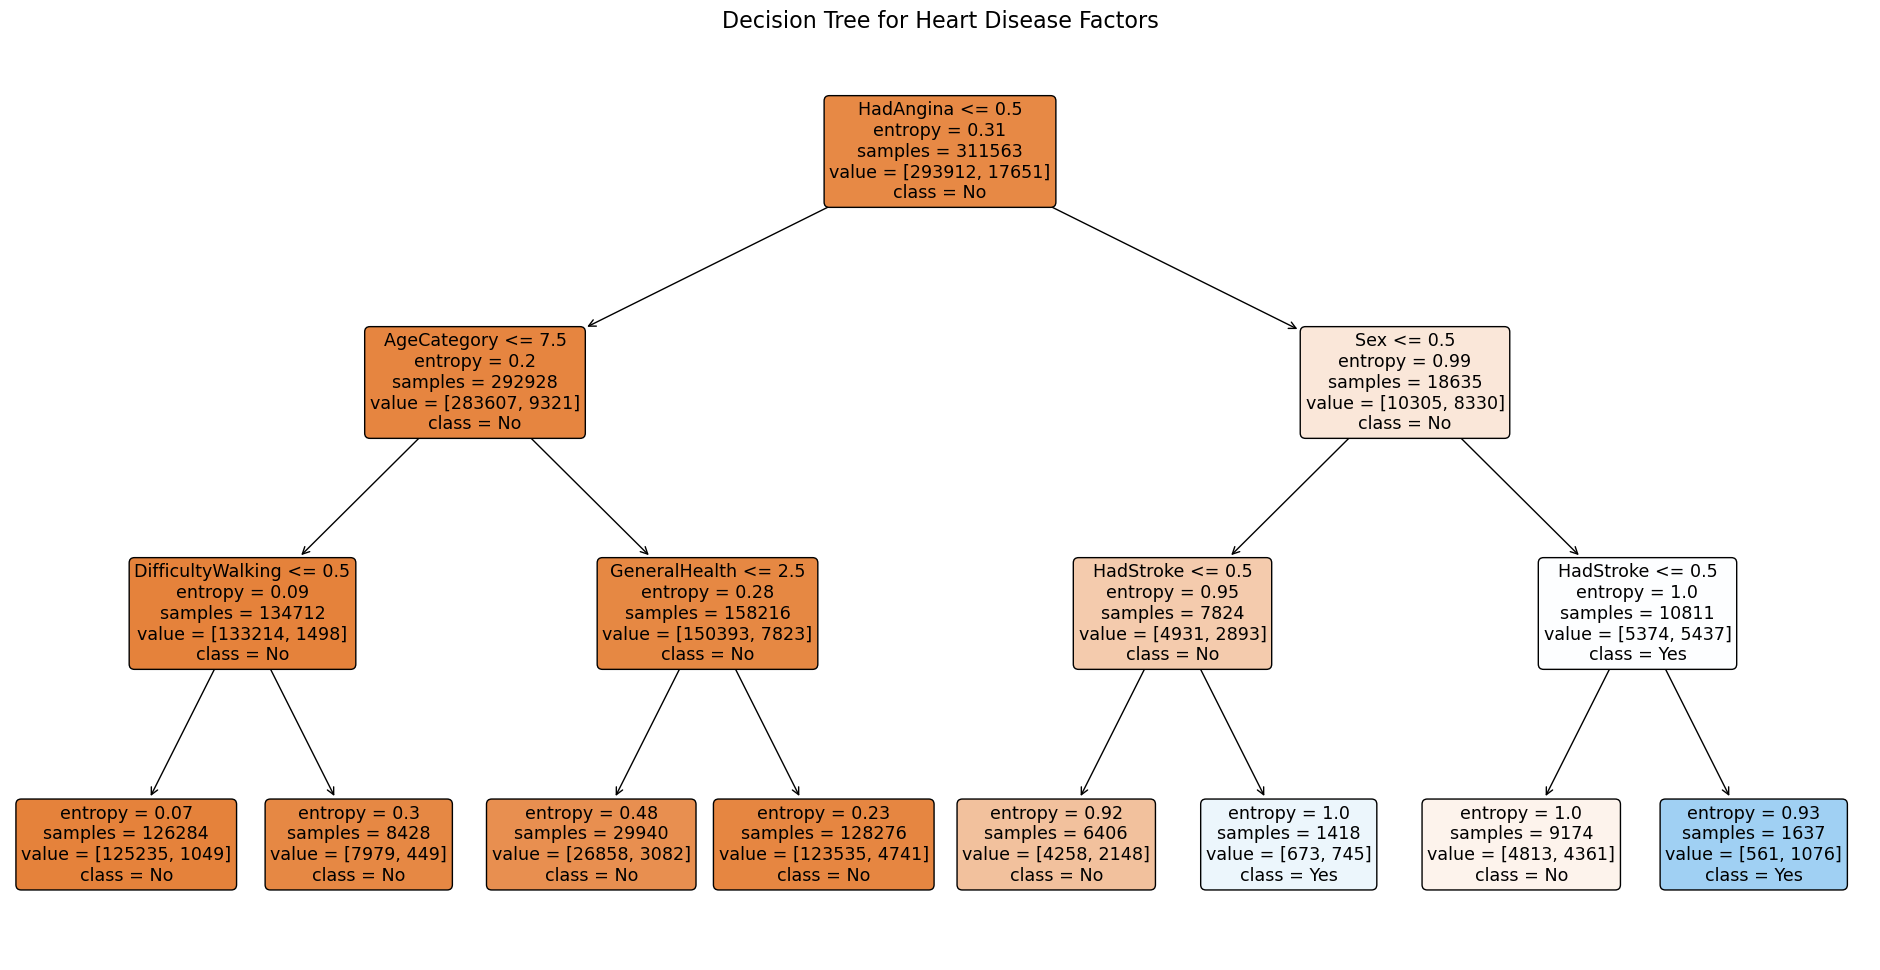

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Train your decision tree classifier with a limited depth
dt_classifier = DecisionTreeClassifier(max_depth=3, criterion='entropy')  # reducing depth for clarity
dt_classifier.fit(X_train, y_train)

# Visualize the trained Decision Tree with increased figure size
plt.figure(figsize=(24, 12))  # increase the size as needed
tree_plot = plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'], rounded=True, proportion=False, precision=2)
plt.title('Decision Tree for Heart Disease Factors', fontsize=16)

plt.show()


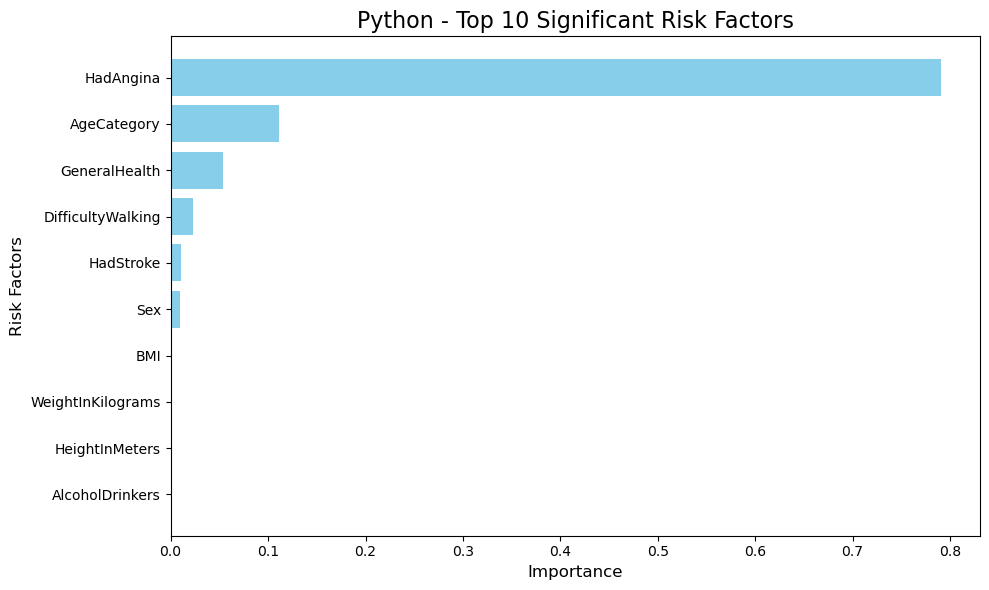

In [49]:
# Extract feature importances
feature_importances = pd.DataFrame(dt_classifier.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Extract the top 10 features and their importances
top_features = feature_importances.head(10)

# Create a horizontal bar chart for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features['importance'], color='skyblue')

# Add title and labels
plt.title('Python - Top 10 Significant Risk Factors', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Risk Factors', fontsize=12)

# Invert y-axis to have the most important feature at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


In [68]:
#Load Images:
with open("./Python_DC.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
python_dc = f'<img src="data:image/png;base64,{encoded_string}" alt="Python TOP" />'
with open("./R_DC.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
r_dc = f'<img src="data:image/png;base64,{encoded_string}" alt="Python TOP" />'
with open("./Python_top.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
python_top = f'<img src="data:image/png;base64,{encoded_string}" alt="Python TOP" />'
with open("./R_top.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
r_top = f'<img src="data:image/png;base64,{encoded_string}" alt="Python TOP" />'
